### Libraries

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

### Data loading

In [39]:
data = pd.read_csv("HIGGS_8K_cleaned.csv", header=None)

features = {
    'all': data.iloc[:, 1:],
    'low': data.iloc[:, 1:22],
    'high': data.iloc[:, 22:]
}
target = data[0]

### Separating to train-test sets

In [40]:
def create_splits(features, target):
    return train_test_split(features, target, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test = create_splits(features['all'], target)
Xl_train, Xl_test, _, _ = create_splits(features['low'], target)
Xh_train, Xh_test, _, _ = create_splits(features['high'], target)

### Data normalization

In [41]:
def scale_data(train, test):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    return train_scaled, test_scaled

X_train_sc, X_test_sc = scale_data(X_train, X_test)
Xl_train_sc, Xl_test_sc = scale_data(Xl_train, Xl_test)
Xh_train_sc, Xh_test_sc = scale_data(Xh_train, Xh_test)

### Model for all features

In [42]:
def build_model(input_dim):
    model = Sequential([
        Dense(32, activation='tanh', input_shape=(input_dim,)),
        Dense(16, activation='tanh'),
        Dense(8, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.0001), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    return model

model_all = build_model(X_train_sc.shape[1])

/home/konsster/Desktop/AUThPhysDepart/Computational_Quantum_Physics_and_Applications/Project_2/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model training

In [43]:
history_all = model_all.fit(
    X_train_sc, y_train,
    batch_size=16,
    epochs=30,
    validation_data=(X_test_sc, y_test)
)

model_all.summary()

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5237 - loss: 0.7012 - val_accuracy: 0.5347 - val_loss: 0.6885
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5699 - loss: 0.6765 - val_accuracy: 0.5737 - val_loss: 0.6766
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5957 - loss: 0.6676 - val_accuracy: 0.5937 - val_loss: 0.6680
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6126 - loss: 0.6594 - val_accuracy: 0.6077 - val_loss: 0.6617
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6262 - loss: 0.6515 - val_accuracy: 0.6167 - val_loss: 0.6563
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6325 - loss: 0.6475 - val_accuracy: 0.6277 - val_loss: 0.6522
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6376 - loss: 0.6410 - val_accuracy: 0.6367 - val_loss: 0.6486
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6363 - loss: 0.6384 - val_accuracy: 0.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,805 (18.77 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,204 (12.52 KB)

### Training history

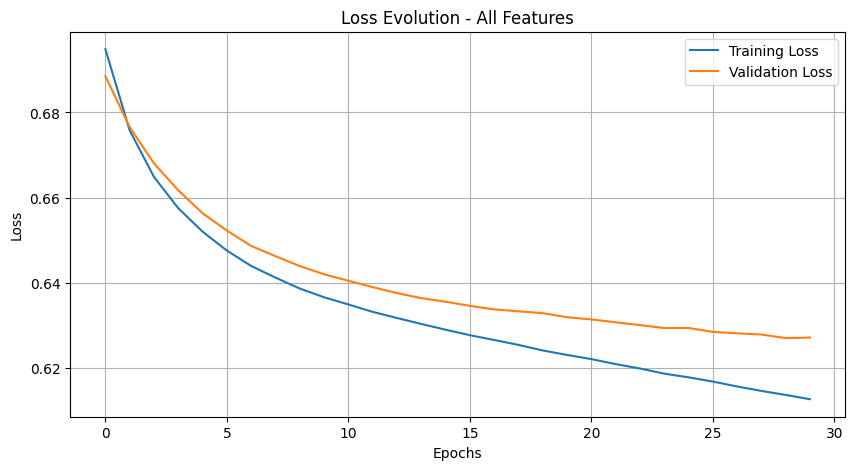

In [44]:
plt.figure(figsize=(10,5))
plt.plot(history_all.history['loss'], label='Training Loss')
plt.plot(history_all.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution - All Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Model evaluation

In [45]:
y_pred_all = model_all.predict(X_test_sc)
y_pred_all_class = (y_pred_all > 0.5).astype(int)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_all_class))

loss, acc = model_all.evaluate(X_test_sc, y_test)
print(f'\nValidation Accuracy: {acc:.4f}')
print(f'Validation Loss: {loss:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
[[510 468]
 [232 791]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 0.6166

Validation Accuracy: 0.6502
Validation Loss: 0.6271


### ROC Curve

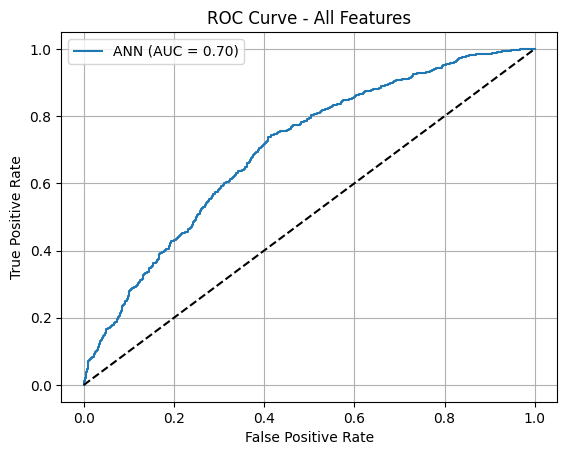

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred_all)
auc_score = roc_auc_score(y_test, y_pred_all)

plt.figure()
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - All Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### Low level features model

In [47]:
model_low = build_model(Xl_train_sc.shape[1])
history_low = model_low.fit(
    Xl_train_sc, y_train,
    batch_size=32,
    epochs=40,
    validation_data=(Xl_test_sc, y_test)
)
model_low.summary()

Epoch 1/40


/home/konsster/Desktop/AUThPhysDepart/Computational_Quantum_Physics_and_Applications/Project_2/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5364 - loss: 0.7349 - val_accuracy: 0.5327 - val_loss: 0.7225
Epoch 2/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5421 - loss: 0.7076 - val_accuracy: 0.5332 - val_loss: 0.7068
Epoch 3/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5330 - loss: 0.7000 - val_accuracy: 0.5422 - val_loss: 0.6984
Epoch 4/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5543 - loss: 0.6870 - val_accuracy: 0.5447 - val_loss: 0.6936
Epoch 5/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5537 - loss: 0.6842 - val_accuracy: 0.5537 - val_loss: 0.6908
Epoch 6/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5699 - loss: 0.6800 - val_accuracy: 0.5507 - val_loss: 0.6887
Epoch 7/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5668 - loss: 0.6799 - val_accuracy: 0.5572 - val_loss: 0.6873
Epoch 8/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5494 - loss: 0.6824 - val_accuracy: 0.5587 - val_

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 32)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,133 (16.15 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,756 (10.77 KB)

### Training history (low)

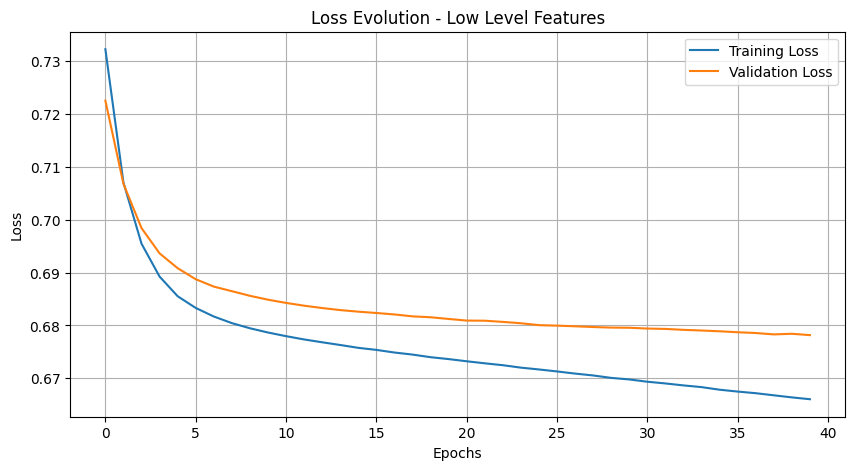

In [48]:
plt.figure(figsize=(10,5))
plt.plot(history_low.history['loss'], label='Training Loss')
plt.plot(history_low.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution - Low Level Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Model evaluation (low)

In [49]:
y_pred_low = model_low.predict(Xl_test_sc)
y_pred_low_class = (y_pred_low > 0.5).astype(int)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_low_class))

loss, acc = model_low.evaluate(Xl_test_sc, y_test)
print(f'\nValidation Accuracy: {acc:.4f}')
print(f'Validation Loss: {loss:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[444 534]
 [326 697]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5764 - loss: 0.6738

Validation Accuracy: 0.5702
Validation Loss: 0.6782


### ROC Curve (low)

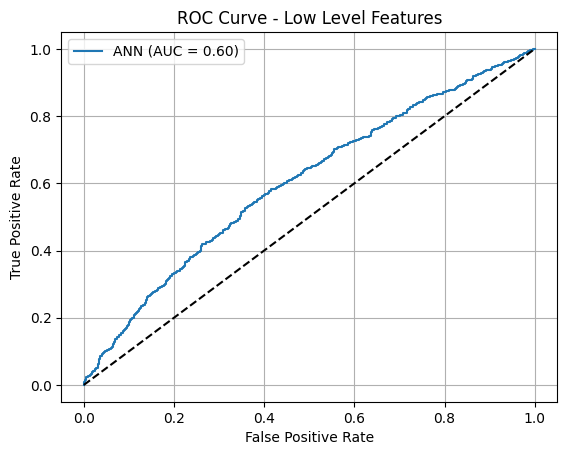

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_pred_low)
auc_score = roc_auc_score(y_test, y_pred_low)

plt.figure()
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Low Level Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### High level features model

In [51]:
def build_high_model(input_dim):
    model = Sequential([
        Dense(128, activation='tanh', input_shape=(input_dim,)),
        Dense(64, activation='tanh'),
        Dense(32, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(8, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.0001), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    return model

model_high = build_high_model(Xh_train_sc.shape[1])

/home/konsster/Desktop/AUThPhysDepart/Computational_Quantum_Physics_and_Applications/Project_2/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model training (high)

In [52]:
history_high = model_high.fit(
    Xh_train_sc, y_train,
    batch_size=64,
    epochs=180,
    validation_data=(Xh_test_sc, y_test)
)
model_high.summary()

Epoch 1/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5891 - loss: 0.6856 - val_accuracy: 0.6132 - val_loss: 0.6628
Epoch 2/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6305 - loss: 0.6561 - val_accuracy: 0.6312 - val_loss: 0.6496
Epoch 3/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6329 - loss: 0.6490 - val_accuracy: 0.6292 - val_loss: 0.6429
Epoch 4/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6481 - loss: 0.6393 - val_accuracy: 0.6332 - val_loss: 0.6389
Epoch 5/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6289 - loss: 0.6454 - val_accuracy: 0.6347 - val_loss: 0.6355
Epoch 6/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6382 - loss: 0.6434 - val_accuracy: 0.6327 - val_loss: 0.6337
Epoch 7/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6555 - loss: 0.6267 - val_accuracy: 0.6392 - val_loss: 0.6307
Epoch 8/180
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6318 - loss: 0.6364 - val_accuracy: 0.6

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,101 (141.02 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,068 (94.02 KB)

### Training history (high)

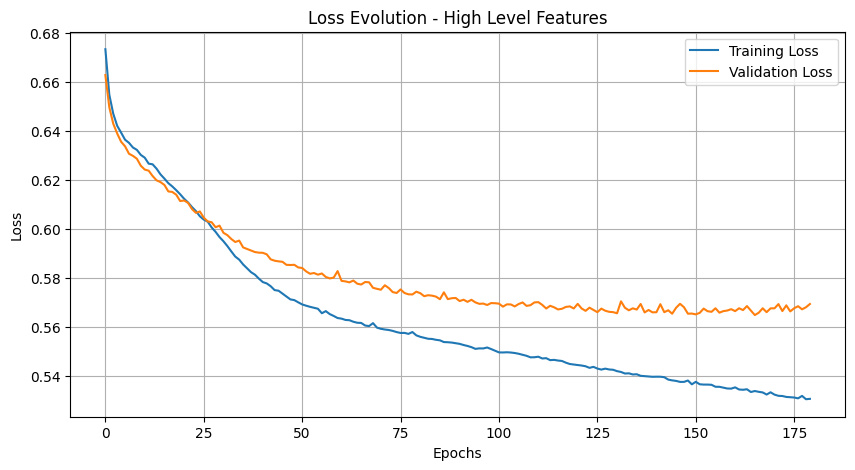

In [53]:
plt.figure(figsize=(10,5))
plt.plot(history_high.history['loss'], label='Training Loss')
plt.plot(history_high.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution - High Level Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Model evaluation (high)

In [54]:
y_pred_high = model_high.predict(Xh_test_sc)
y_pred_high_class = (y_pred_high > 0.5).astype(int)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_high_class))

loss, acc = model_high.evaluate(Xh_test_sc, y_test)
print(f'\nValidation Accuracy: {acc:.4f}')
print(f'Validation Loss: {loss:.4f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix:
[[686 292]
 [293 730]]
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7031 - loss: 0.5702

Validation Accuracy: 0.7076
Validation Loss: 0.5693


### ROC Curve (high)

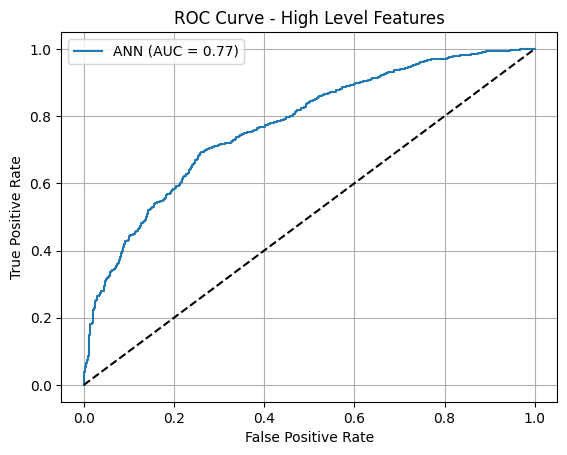

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_pred_high)
auc_score = roc_auc_score(y_test, y_pred_high)

plt.figure()
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - High Level Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()